In [6]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
# Generate a dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

In [3]:
# Create a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

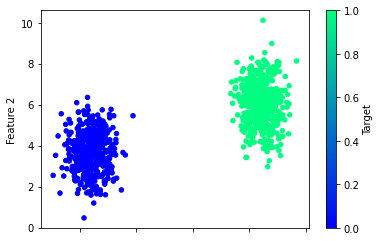

In [4]:
# Plot the dummy data
df.plot.scatter(
    x="Feature 1",
    y="Feature 2",
    c="Target",
    colormap="winter")

In [7]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
### Normalize/standardize the dummy data

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# Add the first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [11]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [12]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.6720
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.7147
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6112 - accuracy: 0.7293
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.7400
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7533
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7627
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.7760
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.7853
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7907
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.8013
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.1091 - accuracy: 0.9960
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9960
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9960
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9960
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.9960
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.9960
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.9960
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0955 - accuracy: 0.9960
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9960
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9960
Epoch 93/100


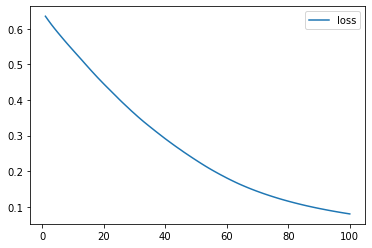

In [15]:
### Visualize the model's loss over time

# Create a DataFrame containing training history
history_df = pd.DataFrame(
                fit_model.history,
                index=range(1, len(fit_model.history["loss"]) + 1))

# Plot the loss
history_df.plot(y="loss")

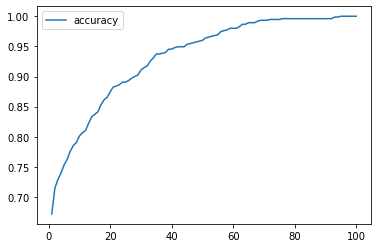

In [16]:
### Visualize the model's accuracy over time

# Plot the accuracy
history_df.plot(y="accuracy")

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0805 - accuracy: 1.0000
Loss: 0.08045156300067902, Accuracy: 1.0


In [20]:
# Predict the classification of a new set of blob data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

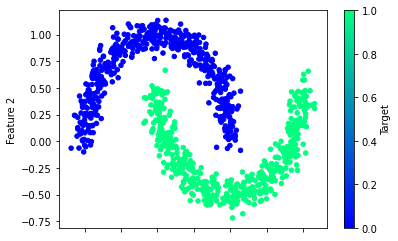

In [21]:
from sklearn.datasets import make_moons

# Create dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transform y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Create a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(
                x="Feature 1",
                y="Feature 2",
                c="Target",
                colormap="winter")

In [22]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [23]:
# Train the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 6ms/step - loss: 1.2701 - accuracy: 0.4040
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0869 - accuracy: 0.4480
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9718 - accuracy: 0.4760
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8922 - accuracy: 0.4920
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8327 - accuracy: 0.5227
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7860 - accuracy: 0.5440
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7475 - accuracy: 0.5640
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7149 - accuracy: 0.5840
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.6000
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6120
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.8880
Epoch 82/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.8893
Epoch 83/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2693 - accuracy: 0.8880
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.8893
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2684 - accuracy: 0.8893
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2680 - accuracy: 0.8880
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2676 - accuracy: 0.8893
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2672 - accuracy: 0.8893
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2668 - accuracy: 0.8893
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.8893
Epoch 91/100


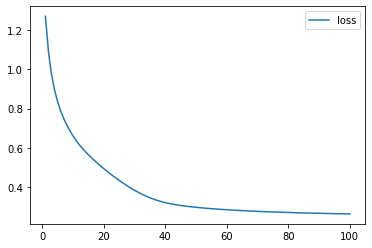

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"]) + 1))

# Plot the loss
history_df.plot(y="loss")

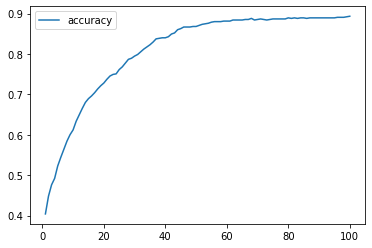

In [26]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [27]:
### Multiple-Neuron Neural Network ###

In [28]:
# Generate a new Sequential model
new_model = tf.keras.models.Sequential()

In [29]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(
    tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probabiliy activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [30]:
# Compile the Sequential model together and customize metrics
new_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.7760
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7907
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.7973
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.8053
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.8080
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.8120
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.8200
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.8280
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8333
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8493
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9040
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9027
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9040
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9040
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9040
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9027
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9027
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9027
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9040
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2123 - accuracy: 0.9053
Epoch 93/100
